# 🚧 Roadwords dataset


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

#"C:/Users/Gebruiker/Documents/Data/ANWB_Data_23_02_2022/roadworks - history"
#C:/Users/megin/OneDrive/Documenten/GitHub/AI/Data/ANWB_Data_23_02_2022/roadworks - history

In [27]:
plt.style.use('seaborn')

In [28]:
import pyarrow
df = pd.read_parquet('C:/Users/megin/OneDrive/Documenten/GitHub/AI/Data/ANWB_Data_23_02_2022/roadworks - history', engine='pyarrow')
df

,roadwork_id,loaddatetimeutc,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop,...,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,segmentstart,segmentend,roadwork_afrc,roadwork_category,roadwork_type
0,276270247.0,2021-06-23 21:04:00,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,2021-06-23 19:00:00,2021-06-24 03:00:00,...,52.22478,5.25528,52.22478,5.25528,3000.0,Amsterdam,Amersfoort,0.0,roadworks,a
1,276396982.0,2021-06-23 21:04:00,A1,a,Hilversum-Noord,Hilversum-Noord,closed,De oprit is dicht. Van 23 juni 2021 21:00 uur ...,2021-06-23 19:00:00,2021-06-24 03:00:00,...,52.24934,5.21355,52.24934,5.21355,3000.0,Amsterdam,Amersfoort,0.0,roadworks,a
2,276396621.0,2021-06-23 21:04:00,A1,a,Amersfoort-Noord,Amersfoort-Noord,closed,De oprit is dicht. Van 23 juni 2021 20:00 uur ...,2021-06-23 18:00:00,2021-06-24 03:00:00,...,52.19401,5.40317,52.19401,5.40317,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a
3,276396620.0,2021-06-23 21:04:00,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,2021-06-23 18:00:00,2021-06-24 03:00:00,...,52.20803,5.36791,52.20803,5.36791,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a
4,276397171.0,2021-06-23 21:04:00,A1,a,afrit Soest,afrit Soest,closed,De op- en afrit is dicht. Van 24 juni 2021 22:...,2021-06-24 20:00:00,2021-06-25 03:00:00,...,52.22478,5.25528,52.22478,5.25528,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210473,NaN,NaT,None,None,None,None,None,None,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None
4210474,NaN,NaT,None,None,None,None,None,None,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None
4210475,NaN,NaT,None,None,None,None,None,None,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None
4210476,NaN,NaT,None,None,None,None,None,None,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210478 entries, 0 to 4210477
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   roadwork_id           float64       
 1   loaddatetimeutc       datetime64[ns]
 2   road                  object        
 3   type                  object        
 4   roadwork_from         object        
 5   roadwork_to           object        
 6   roadwork_label        object        
 7   roadwork_reason       object        
 8   roadwork_start        datetime64[ns]
 9   roadwork_stop         datetime64[ns]
 10  radar_codedirection   float64       
 11  roadwork_fromloc_lat  float64       
 12  roadwork_fromloc_lon  float64       
 13  roadwork_toloc_lat    float64       
 14  roadwork_toloc_lon    float64       
 15  roadwork_segmentid    float64       
 16  segmentstart          object        
 17  segmentend            object        
 18  roadwork_afrc         float64       
 19  

__________________

# 🧹 Cleaning the dataset

💬 First seperate the date and time in seperate columns

In [30]:
df['loadDates'] = pd.to_datetime(df['loaddatetimeutc']).dt.date
df['loadTime'] = pd.to_datetime(df['loaddatetimeutc']).dt.time

💬 Then delete the previous column we took the date and time from

In [31]:
del df['loaddatetimeutc']

💬 The new dataset looks like this with the new columns at the end

In [32]:
df

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop,radar_codedirection,...,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,segmentstart,segmentend,roadwork_afrc,roadwork_category,roadwork_type,loadDates,loadTime
0,276270247.0,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,2021-06-23 19:00:00,2021-06-24 03:00:00,1.0,...,52.22478,5.25528,3000.0,Amsterdam,Amersfoort,0.0,roadworks,a,2021-06-23,21:04:00
1,276396982.0,A1,a,Hilversum-Noord,Hilversum-Noord,closed,De oprit is dicht. Van 23 juni 2021 21:00 uur ...,2021-06-23 19:00:00,2021-06-24 03:00:00,1.0,...,52.24934,5.21355,3000.0,Amsterdam,Amersfoort,0.0,roadworks,a,2021-06-23,21:04:00
2,276396621.0,A1,a,Amersfoort-Noord,Amersfoort-Noord,closed,De oprit is dicht. Van 23 juni 2021 20:00 uur ...,2021-06-23 18:00:00,2021-06-24 03:00:00,0.0,...,52.19401,5.40317,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00
3,276396620.0,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,2021-06-23 18:00:00,2021-06-24 03:00:00,0.0,...,52.20803,5.36791,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00
4,276397171.0,A1,a,afrit Soest,afrit Soest,closed,De op- en afrit is dicht. Van 24 juni 2021 22:...,2021-06-24 20:00:00,2021-06-25 03:00:00,0.0,...,52.22478,5.25528,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210473,NaN,None,None,None,None,None,None,NaT,NaT,NaN,...,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN
4210474,NaN,None,None,None,None,None,None,NaT,NaT,NaN,...,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN
4210475,NaN,None,None,None,None,None,None,NaT,NaT,NaN,...,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN
4210476,NaN,None,None,None,None,None,None,NaT,NaT,NaN,...,NaN,NaN,NaN,None,None,NaN,None,None,NaN,NaN


💬 Here we do the previous step for all the time columns

In [33]:
#Roadwork start
df['startDates'] = pd.to_datetime(df['roadwork_start']).dt.date
df['startTime'] = pd.to_datetime(df['roadwork_start']).dt.time
#roadwork end
df['endDates'] = pd.to_datetime(df['roadwork_stop']).dt.date
df['endTime'] = pd.to_datetime(df['roadwork_stop']).dt.time

In [34]:
del df['roadwork_start']
del df['roadwork_stop']
df

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,segmentend,roadwork_afrc,roadwork_category,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime
0,276270247.0,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,1.0,52.22478,5.25528,...,Amersfoort,0.0,roadworks,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00
1,276396982.0,A1,a,Hilversum-Noord,Hilversum-Noord,closed,De oprit is dicht. Van 23 juni 2021 21:00 uur ...,1.0,52.24934,5.21355,...,Amersfoort,0.0,roadworks,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00
2,276396621.0,A1,a,Amersfoort-Noord,Amersfoort-Noord,closed,De oprit is dicht. Van 23 juni 2021 20:00 uur ...,0.0,52.19401,5.40317,...,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00
3,276396620.0,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,0.0,52.20803,5.36791,...,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00
4,276397171.0,A1,a,afrit Soest,afrit Soest,closed,De op- en afrit is dicht. Van 24 juni 2021 22:...,0.0,52.22478,5.25528,...,Amsterdam,0.0,roadworks,a,2021-06-23,21:04:00,2021-06-24,20:00:00,2021-06-25,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210473,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4210474,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4210475,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4210476,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN


💬 Check if there are null values

In [35]:
df.isnull()

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,segmentend,roadwork_afrc,roadwork_category,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210473,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4210474,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4210475,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4210476,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


💬 I now want know what day of the week everything is


In [36]:
df['weekdayStart'] = pd.to_datetime(df['startDates']).dt.day_name()
df['weekdayEnd'] = pd.to_datetime(df['endDates']).dt.day_name()
df

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,roadwork_category,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime,weekdayStart,weekdayEnd
0,276270247.0,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,1.0,52.22478,5.25528,...,roadworks,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00,Wednesday,Thursday
1,276396982.0,A1,a,Hilversum-Noord,Hilversum-Noord,closed,De oprit is dicht. Van 23 juni 2021 21:00 uur ...,1.0,52.24934,5.21355,...,roadworks,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00,Wednesday,Thursday
2,276396621.0,A1,a,Amersfoort-Noord,Amersfoort-Noord,closed,De oprit is dicht. Van 23 juni 2021 20:00 uur ...,0.0,52.19401,5.40317,...,roadworks,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00,Wednesday,Thursday
3,276396620.0,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,0.0,52.20803,5.36791,...,roadworks,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00,Wednesday,Thursday
4,276397171.0,A1,a,afrit Soest,afrit Soest,closed,De op- en afrit is dicht. Van 24 juni 2021 22:...,0.0,52.22478,5.25528,...,roadworks,a,2021-06-23,21:04:00,2021-06-24,20:00:00,2021-06-25,03:00:00,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210473,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4210474,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4210475,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4210476,NaN,None,None,None,None,None,None,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


💬 every weekday is now in the dataset for start and end roadwork

💬 Making a seperate column for the month of roadwork:

In [37]:
df['Month'] = pd.to_datetime(df['startDates']).dt.month_name()
print(df['Month'])

0          June
1          June
2          June
3          June
4          June
           ... 
4210473     NaN
4210474     NaN
4210475     NaN
4210476     NaN
4210477     NaN
Name: Month, Length: 4210478, dtype: object


💬 Drop the null values

In [38]:
df1 = df.dropna()
#df1 is df without null values
df1

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime,weekdayStart,weekdayEnd,Month
0,2.762702e+08,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,1.0,52.22478,5.25528,...,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00,Wednesday,Thursday,June
1,2.763970e+08,A1,a,Hilversum-Noord,Hilversum-Noord,closed,De oprit is dicht. Van 23 juni 2021 21:00 uur ...,1.0,52.24934,5.21355,...,a,2021-06-23,21:04:00,2021-06-23,19:00:00,2021-06-24,03:00:00,Wednesday,Thursday,June
2,2.763966e+08,A1,a,Amersfoort-Noord,Amersfoort-Noord,closed,De oprit is dicht. Van 23 juni 2021 20:00 uur ...,0.0,52.19401,5.40317,...,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00,Wednesday,Thursday,June
3,2.763966e+08,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,0.0,52.20803,5.36791,...,a,2021-06-23,21:04:00,2021-06-23,18:00:00,2021-06-24,03:00:00,Wednesday,Thursday,June
4,2.763972e+08,A1,a,afrit Soest,afrit Soest,closed,De op- en afrit is dicht. Van 24 juni 2021 22:...,0.0,52.22478,5.25528,...,a,2021-06-23,21:04:00,2021-06-24,20:00:00,2021-06-25,03:00:00,Thursday,Friday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207935,2.605920e+09,N256,n,de Zeelandbrug,de Zeelandbrug,closed,Dicht. Van 5 januari 2021 00:00 uur tot 5 janu...,2.0,51.61232,3.89141,...,n,2020-12-31,20:49:00,2021-01-04,23:00:00,2021-01-05,04:00:00,Monday,Tuesday,January
4207941,2.605920e+08,N256,n,de Zeelandbrug,de Zeelandbrug,closed,Dicht. Van 5 januari 2021 00:00 uur tot 5 janu...,2.0,51.61232,3.89141,...,n,2021-01-02,22:25:00,2021-01-04,23:00:00,2021-01-05,04:00:00,Monday,Tuesday,January
4207942,2.605920e+09,N256,n,de Zeelandbrug,de Zeelandbrug,closed,Dicht. Van 5 januari 2021 00:00 uur tot 5 janu...,2.0,51.61232,3.89141,...,n,2021-01-02,22:25:00,2021-01-04,23:00:00,2021-01-05,04:00:00,Monday,Tuesday,January
4207948,2.605920e+08,N256,n,de Zeelandbrug,de Zeelandbrug,closed,Dicht. Van 5 januari 2021 00:00 uur tot 5 janu...,2.0,51.61232,3.89141,...,n,2021-01-01,00:49:00,2021-01-04,23:00:00,2021-01-05,04:00:00,Monday,Tuesday,January


💬 We now want to order the days of the week and the Months from mon-sun and jan-dec:

In [39]:
# Defining the order of the days of the week
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]

In [40]:
# we sort the column weekdaystart to the vaiurbale day
df['weekdayStart'] = pd.Categorical(df['weekdayStart'], categories=day, ordered=True)

In [41]:
#first I replace the full name of the month "February" to "feb" for easier readability
df['Month'] = df['Month'].map({'February': 'Feb', 'June':'Jun', 'May':'May', 'September':'Sep', 'July':'Jul', 'April':'Apr', 'August':'Aug', 'December':'Dec', 'March':'Mar', 'October':'Oct', 'November':'Nov', 'January':'Jan'})

In [42]:
# We create a variable with the order of the months we want
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [43]:
# we sort the column month on the variable months
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

__________

# 📊 Data understanding

💬 Checking how many unique values there are in roadwork category column

In [14]:
df1.roadwork_category.unique()

array(['roadworks'], dtype=object)

💬 Checking how many unique values there are in roadwork label column

In [15]:
df1.roadwork_label.unique()

array(['closed', 'accident'], dtype=object)

💬 Checking how many unique values there are in roadwork category column

In [16]:
df1.roadwork_category.unique()

array(['roadworks'], dtype=object)

💬 Making a simple countplot to see how many of the unique values ()

<AxesSubplot:xlabel='count', ylabel='roadwork_label'>

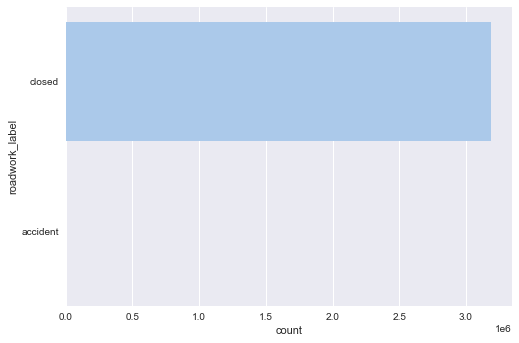

In [17]:
sns.countplot(y="roadwork_label", data=df1,
            palette="pastel")

💬 This graph shows the count of either closed or accident. You can tell we dont actually have any accidents in roadwork

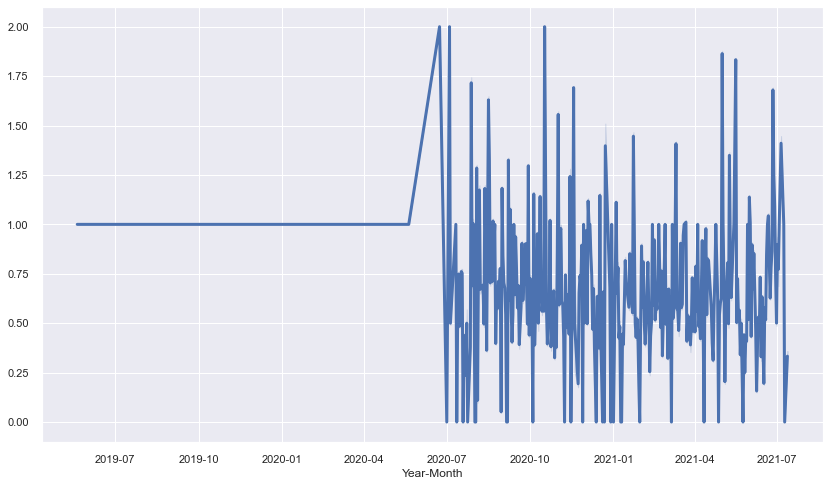

In [18]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df1, x ='startDates', y = 'radar_codedirection',
                  palette='viridis',
                  legend='full', lw=3)

plt.ylabel('')
plt.xlabel('Year-Month')
plt.show()

💬 Above graph shows the time visualization of the startdates of roadwork and radar_codedirection

💬 I then make our dataset smaller by limiting us to just Eindhoven

In [52]:
df2 = df1['roadwork_from'] == 'Eindhoven'

In [53]:
df3 = df1[df2]
df3

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime,weekdayStart,weekdayEnd,Month
430832,255877518.0,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,19:14:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
430903,255877518.0,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,22:33:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
430974,255877518.0,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,15:59:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
431045,255877518.0,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,14:54:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
431116,255877518.0,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,12:29:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116569,263929844.0,A50,a,Eindhoven,Industrieterrein Ekkersrijt,closed,Dicht. Van 12 februari 2021 21:30 uur tot 13 f...,0.0,51.49684,5.47795,...,a,2021-02-13,04:54:00,2021-02-12,20:30:00,2021-02-13,07:00:00,Friday,Saturday,February
4116586,263929844.0,A50,a,Eindhoven,Industrieterrein Ekkersrijt,closed,Dicht. Van 12 februari 2021 21:30 uur tot 13 f...,0.0,51.49684,5.47795,...,a,2021-02-13,06:54:00,2021-02-12,20:30:00,2021-02-13,07:00:00,Friday,Saturday,February
4116603,263929844.0,A50,a,Eindhoven,Industrieterrein Ekkersrijt,closed,Dicht. Van 12 februari 2021 21:30 uur tot 13 f...,0.0,51.49684,5.47795,...,a,2021-02-13,04:24:00,2021-02-12,20:30:00,2021-02-13,07:00:00,Friday,Saturday,February
4116620,263929844.0,A50,a,Eindhoven,Industrieterrein Ekkersrijt,closed,Dicht. Van 12 februari 2021 21:30 uur tot 13 f...,0.0,51.49684,5.47795,...,a,2021-02-13,05:39:00,2021-02-12,20:30:00,2021-02-13,07:00:00,Friday,Saturday,February


In [54]:
df4 = df3['roadwork_to'] == 'Eindhoven'

In [55]:
df4

430832      True
430903      True
430974      True
431045      True
431116      True
           ...  
4116569    False
4116586    False
4116603    False
4116620    False
4116637    False
Name: roadwork_to, Length: 5987, dtype: bool

In [56]:
df5 = df3[df4]

In [57]:
df5

,roadwork_id,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,...,roadwork_type,loadDates,loadTime,startDates,startTime,endDates,endTime,weekdayStart,weekdayEnd,Month
430832,2.558775e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,19:14:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
430903,2.558775e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,22:33:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
430974,2.558775e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,15:59:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
431045,2.558775e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,14:54:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
431116,2.558775e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 19 oktober 2020 20:30 u...,0.0,51.49684,5.47795,...,a,2020-10-19,12:29:00,2020-10-19,18:30:00,2020-10-20,03:00:00,Monday,Tuesday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974970,2.427742e+09,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 23 juni 2020 21:00 uur ...,2.0,51.49684,5.47795,...,a,2020-07-19,07:29:00,2020-06-23,19:00:00,2020-07-24,19:00:00,Tuesday,Friday,June
3975515,2.427742e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 23 juni 2020 21:00 uur ...,2.0,51.49684,5.47795,...,a,2020-07-19,07:09:00,2020-06-23,19:00:00,2020-07-24,19:00:00,Tuesday,Friday,June
3975516,2.427742e+09,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 23 juni 2020 21:00 uur ...,2.0,51.49684,5.47795,...,a,2020-07-19,07:09:00,2020-06-23,19:00:00,2020-07-24,19:00:00,Tuesday,Friday,June
3975541,2.427742e+08,A50,a,Eindhoven,Eindhoven,closed,De afrit is dicht. Van 23 juni 2020 21:00 uur ...,2.0,51.49684,5.47795,...,a,2020-07-19,07:14:00,2020-06-23,19:00:00,2020-07-24,19:00:00,Tuesday,Friday,June


In [58]:
df5.columns

Index(['roadwork_id', 'road', 'type', 'roadwork_from', 'roadwork_to',
       'roadwork_label', 'roadwork_reason', 'radar_codedirection',
       'roadwork_fromloc_lat', 'roadwork_fromloc_lon', 'roadwork_toloc_lat',
       'roadwork_toloc_lon', 'roadwork_segmentid', 'segmentstart',
       'segmentend', 'roadwork_afrc', 'roadwork_category', 'roadwork_type',
       'loadDates', 'loadTime', 'startDates', 'startTime', 'endDates',
       'endTime', 'weekdayStart', 'weekdayEnd', 'Month'],
      dtype='object')

In [26]:
df5.type.unique()

array(['a'], dtype=object)

💬 We plot the longtitude latidude to get the map of all the roadworks in the netherlands mapped out

<Figure size 1008x576 with 0 Axes>

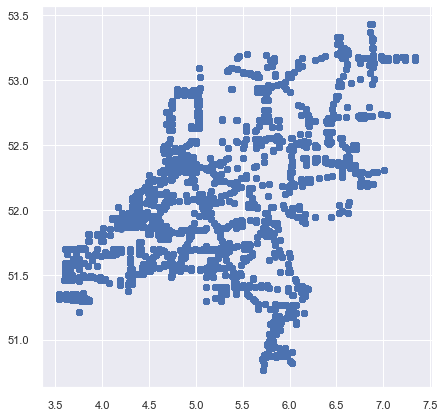

In [27]:

#roadwork_fromloc_lat       
#roadwork_fromloc_lon         
#roadwork_toloc_lat         
#roadwork_toloc_lon
plt.figure();
plt.figure(figsize=[7,7]);
## latitude and longtitude
x = df[['roadwork_toloc_lat','roadwork_fromloc_lat']]
y = df[['roadwork_toloc_lon','roadwork_toloc_lon']]

plt.scatter(y, x)

In [28]:
brabant = df['roadwork_from'] =='Eindhoven', 'Tilburg', 'Breda', 's-Hertogenbosch','Helmond'


In [29]:
count = df5.groupby(['radar_codedirection', 'roadwork_type']).size()
print(count)

radar_codedirection  roadwork_type
0.0                  a                 694
1.0                  a                 492
2.0                  a                4566
dtype: int64


<AxesSubplot:xlabel='count', ylabel='road'>

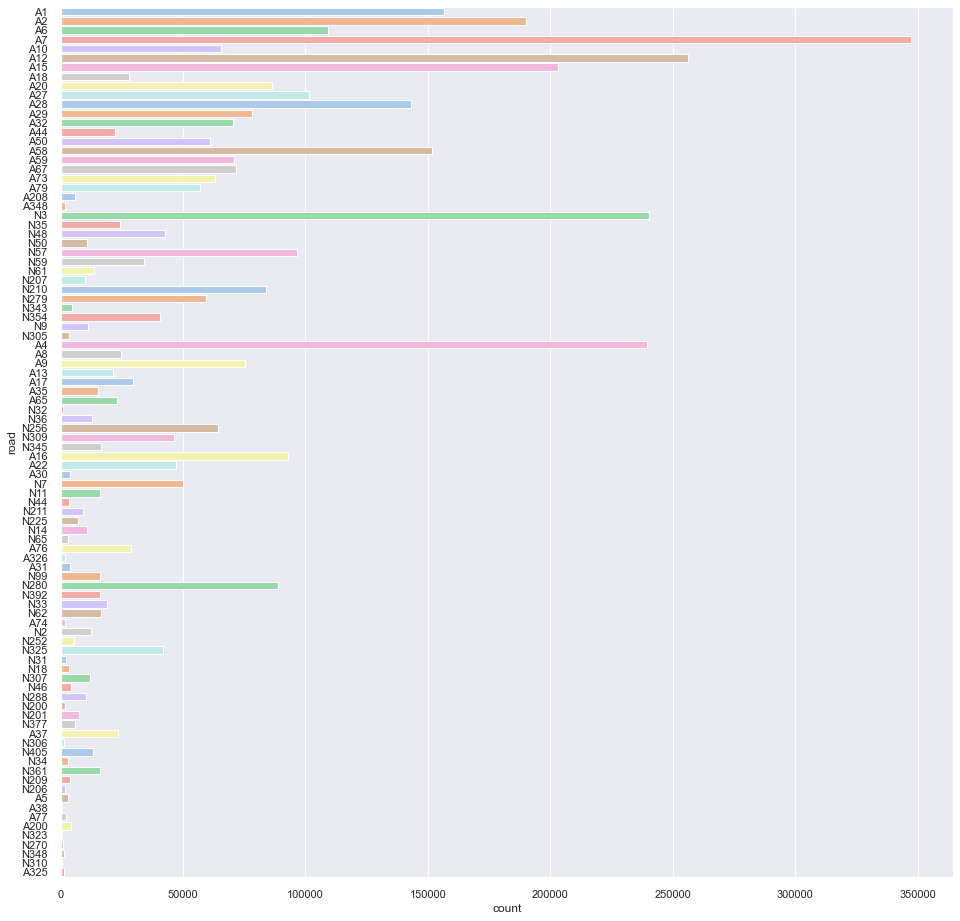

In [30]:
plt.figure(figsize=(16,16))
sns.countplot(y="road", data=df,
            palette="pastel")

💬 This plot shows how many daat entries each road has, the a7 has the most roadworks here.

💬 we should make use of our date time stamps and see which day has the most roadwork in the week.

<AxesSubplot:xlabel='weekdayStart', ylabel='count'>

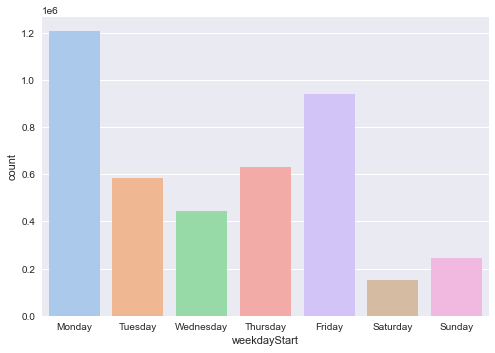

In [22]:
sns.countplot(x="weekdayStart", data=df,
            palette="pastel")

💬 This plot shows Monday has the most roadworks

<AxesSubplot:xlabel='Month', ylabel='count'>

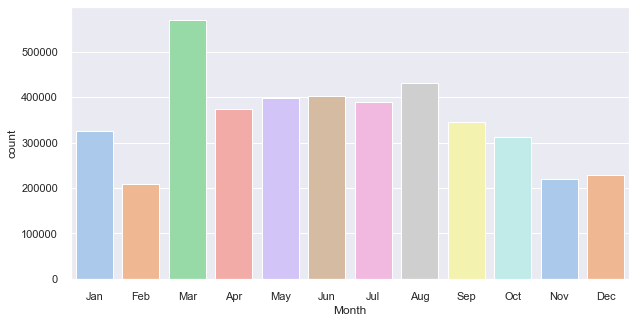

In [35]:
plt.figure(figsize=(10,5))

sns.countplot(x="Month", data=df,
            palette="pastel")

<AxesSubplot:xlabel='startTime', ylabel='count'>

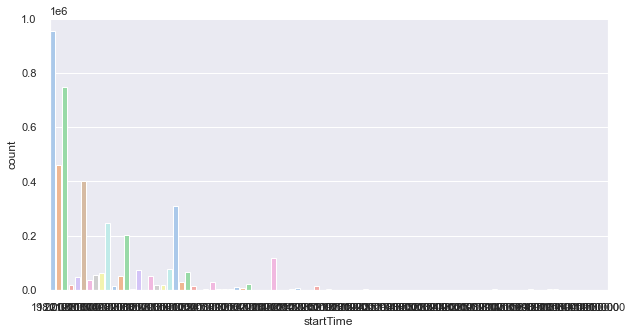

In [36]:
plt.figure(figsize=(10,5))

sns.countplot(x="startTime", data=df,
            palette="pastel")


<AxesSubplot:xlabel='weekdayStart', ylabel='radar_codedirection'>

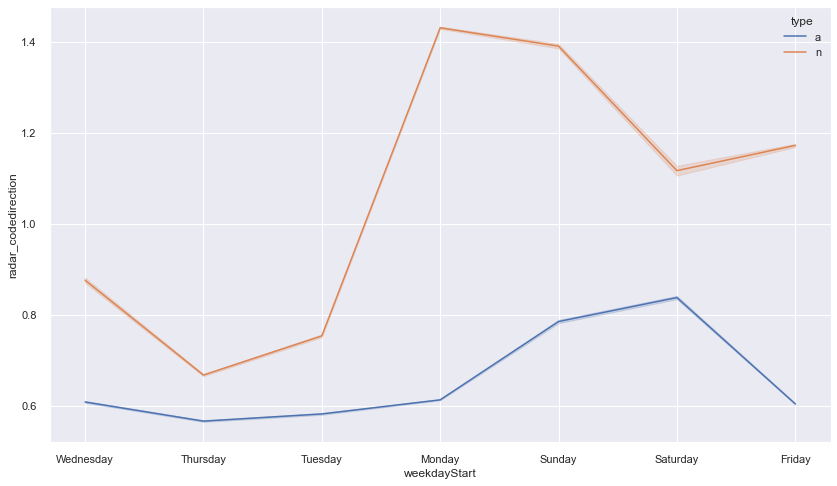

In [37]:
sns.lineplot(x="weekdayStart", y="radar_codedirection",
             hue="type",
             data=df)

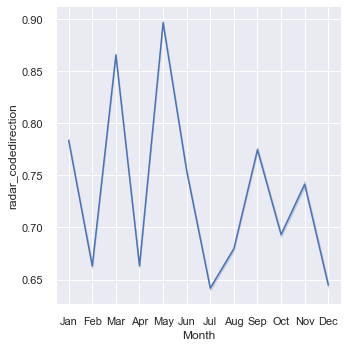

In [38]:
sns.relplot(x="Month", y="radar_codedirection", kind="line", data=df)

In [47]:
df['counts'] = df['Month'].map(df['Month'].value_counts())#we count the amount of dataentries for each month

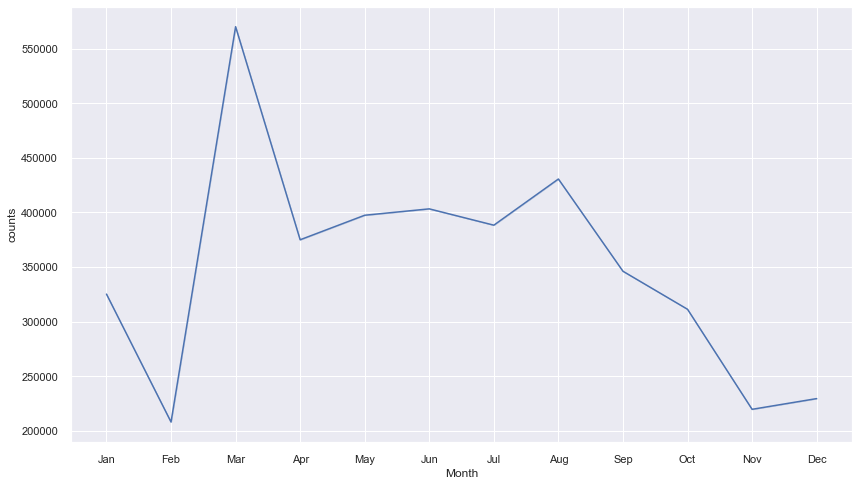

In [41]:
bee = sns.lineplot(data=df, x="Month", y= "counts" )
bee.invert_yaxis()

In [48]:
df['daycounts'] = df['weekdayStart'].map(df['weekdayStart'].value_counts())

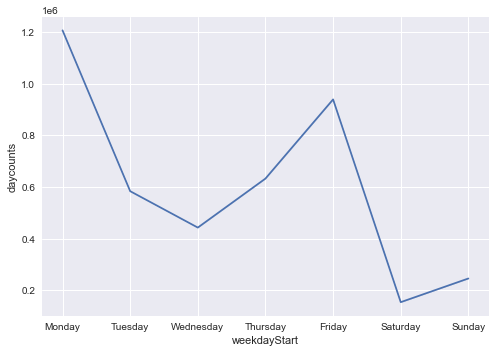

In [49]:
da = sns.lineplot(data=df, x="weekdayStart", y= "daycounts" )
da.invert_yaxis()

## Preprocessing

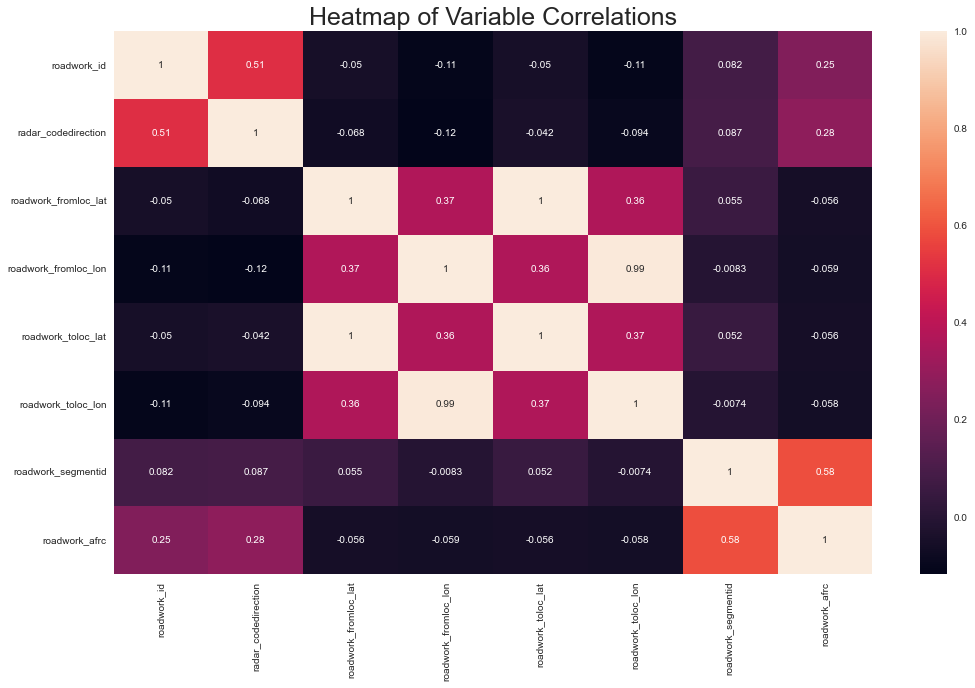

In [60]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()